Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library('tidymodels')



Warning message:
“Failed to locate timezone database”
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ recipes      1.0.9
✔ dials        1.2.0     ✔ rsample      1.2.0
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.4.4     ✔ tidyr        1.3.0
✔ infer        1.0.5     ✔ tune         1.1.2
✔ modeldata    1.2.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.2.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
glimpse(diabetes_train)



Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 5, 10, 4, 10, 1, 3, 5, 6, 3, 7, 7, 1, 2, 7…
$ Glucose                  <dbl> 89, 116, 115, 110, 139, 103, 126, 117, 92, 18…
$ BloodPressure            <dbl> 66, 74, 0, 92, 80, 30, 88, 92, 92, 64, 84, 64…
$ SkinThickness            <dbl> 23, 0, 0, 0, 0, 38, 41, 0, 0, 25, 0, 0, 0, 27…
$ Insulin                  <dbl> 94, 0, 0, 0, 0, 83, 235, 0, 0, 70, 0, 0, 0, 0…
$ BMI                      <dbl> 28.1, 25.6, 35.3, 37.6, 27.1, 43.3, 39.3, 34.…
$ DiabetesPedigreeFunction <dbl> 0.167, 0.201, 0.134, 0.191, 1.441, 0.183, 0.7…
$ Age                      <dbl> 21, 30, 29, 30, 57, 33, 27, 38, 28, 26, 37, 4…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a linear regression model?

**Answer:**

All dbl variables are suitable as the outcome in a linear regression model

❓ Navigate to [Kaggle page]() for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| BMI         |   Body mass index (weight in kg/(height in m)^2          |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

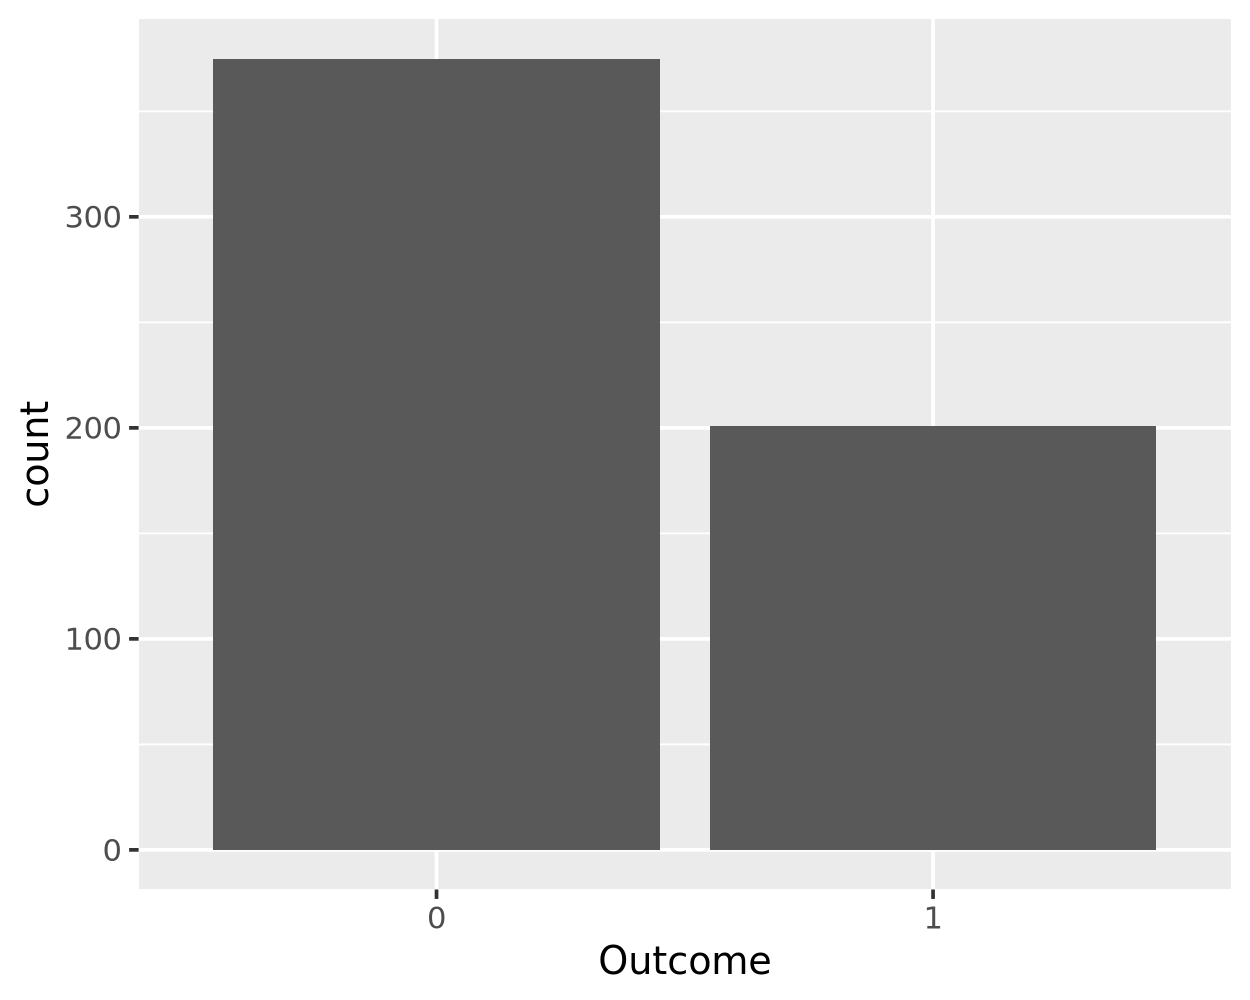

In [5]:
ggplot(diabetes_train, aes(x = Outcome)) + geom_bar()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

The data is not balanced, there are nearly twice as many counts of outcome 0 than outcome 1


Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [6]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6
0,Glucose,115.0
0,BMI,35.3


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

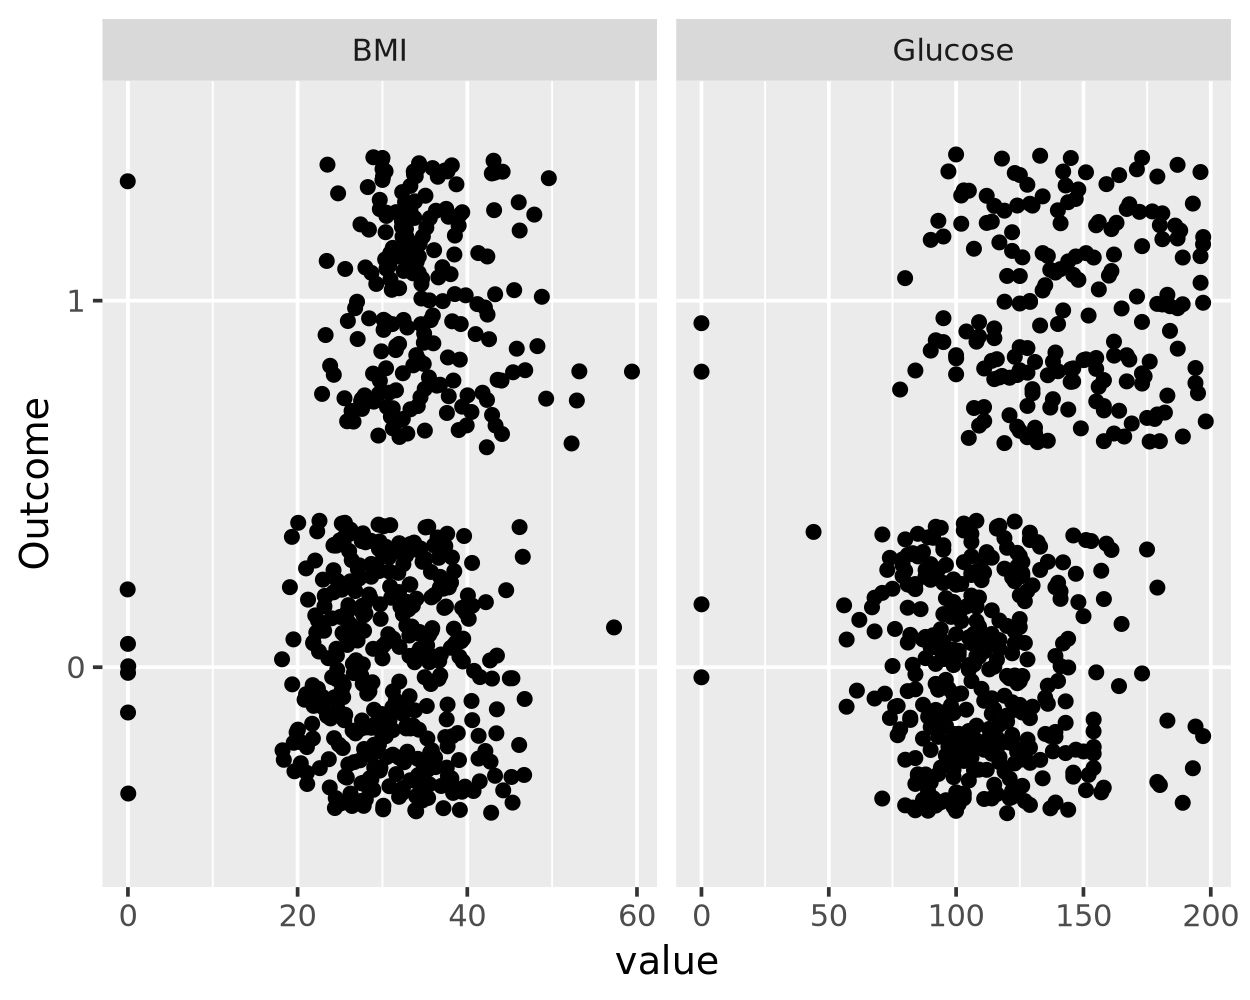

In [7]:
ggplot(plot_df, aes(x = value, y = Outcome)) + geom_jitter() + facet_wrap(~name, ncol = 2, scales = 'free_x')



❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

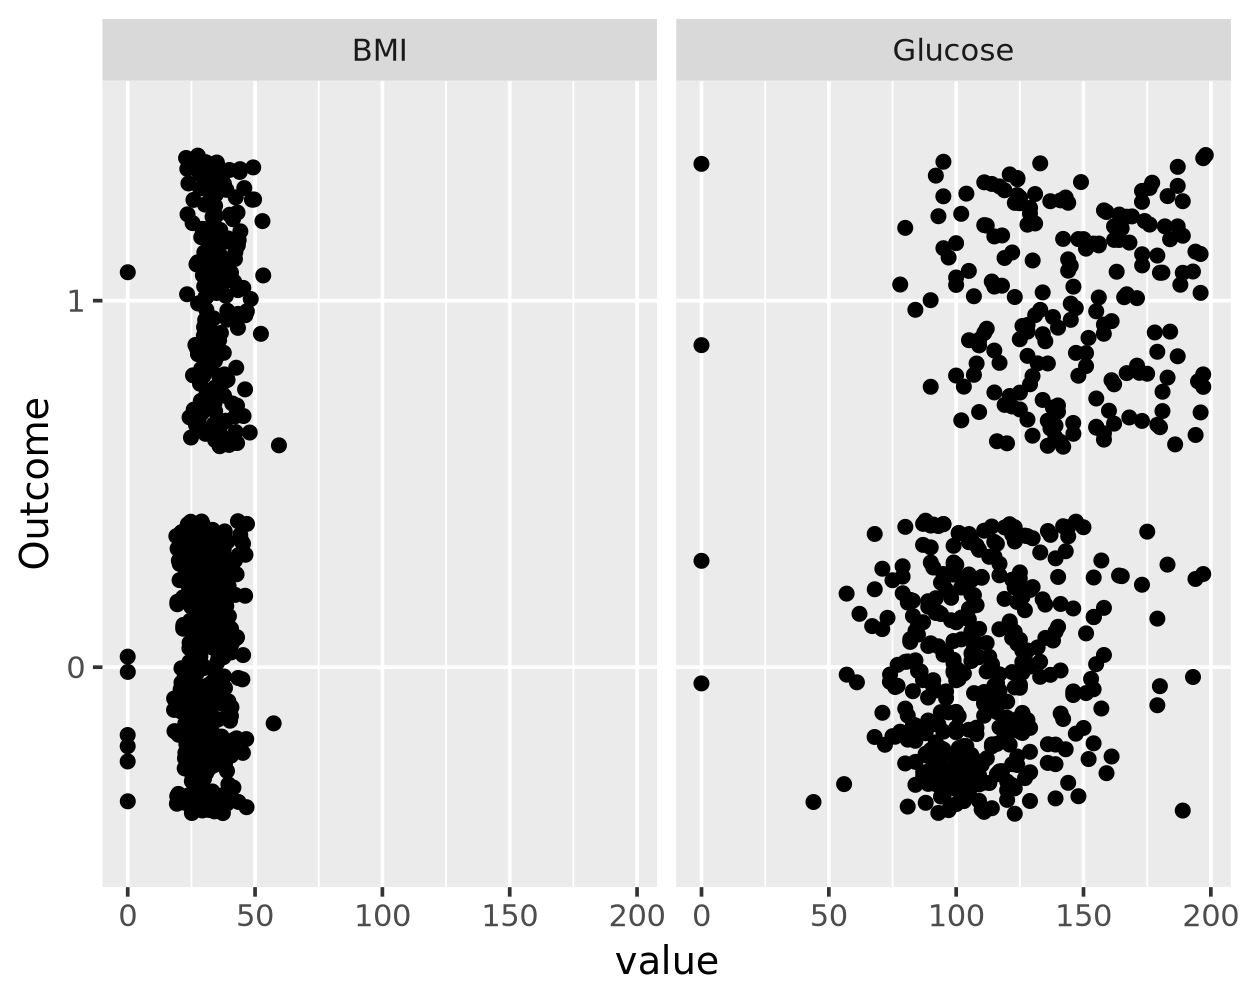

In [8]:
ggplot(plot_df, aes(x = value, y = Outcome)) + geom_jitter() + facet_wrap(~name, ncol = 2)


The scaling changes. When you have the scales = 'free_x' argument, the scale is modified to make the data points for the BMI easier to read by reducing the scale of the x axis. Without it, both charts use the same scale on the x-axis, making it difficult to visualize BMI.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [14]:
mod = logistic_reg() |> set_engine('glm')
mod_fit = mod |> fit(Outcome ~ BMI + Glucose, diabetes_train)

tidy(mod_fit)



term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.49644639,0.708507113,-10.580623,3.665145e-26
BMI,0.07265785,0.015638272,4.646156,3.381779e-06
Glucose,0.03580355,0.003755395,9.533896,1.514883e-21


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabeted_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [15]:
diabetes_test_wPred = augment(mod_fit, diabetes_test)
diabetes_test_wPred



.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0.9255628,0.074437195,1,85,66,29,0,26.6,0.351,31,0
1,0.2176273,0.782372744,10,168,74,0,0,38.0,0.537,34,1
0,0.7037203,0.296279688,1,115,70,30,96,34.6,0.529,32,1
0,0.7989601,0.201039911,8,99,84,0,0,35.4,0.388,50,0
1,0.4297827,0.570217325,11,143,94,33,146,36.6,0.254,51,1
1,0.3476479,0.652352050,7,147,76,0,0,39.4,0.257,43,1
0,0.9119629,0.088037149,1,97,66,15,140,23.2,0.487,22,0
0,0.6663957,0.333604311,13,145,82,19,110,22.2,0.245,57,0
0,0.7267464,0.273253581,5,109,75,26,0,36.0,0.546,60,0


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [16]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 115  33
         1  10  34

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data? 67 individuals
- Of those that actually had diabetes, how many were predicted to have diabetes by your model? 34 predicted
- How many individuals predicted to have diabetes did not have diabetes? 10

**Answer:** 